# Meausre $^{22}$Na $\gamma$ spectra with variable digitization threshold

last edit Jan-5, 2022

## definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
Vthresholds = np.arange(5,21)
colors      = np.random.uniform(size=(16,3))
measurement_names  = ['noSource'  ,'Na22onSensL12port5','Na22onKetek9port6']
measurement_labels = ['background','$^{22}$Na / SensL' ,'$^{22}$Na / KETEK']
dT = 10 # sec
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/VariableThresholdMeasurements/'
colors.shape

(16, 3)

## load data

In [3]:
events = dict()
for measurement_name,measurement_label in zip(measurement_names,measurement_labels):
    for Vth in Vthresholds:
        filename = measurement_name + '_Vth%d'%Vth + '_%dsec_'%dT + 'events.csv'
        events[measurement_label + ' Vth=%d'%Vth] = pd.read_csv( main_data_path + filename )
        # print('loaded ' +filename)        
print('done loading data')

done loading data


## plot

In [4]:
def plot_step_hist( x_arr, bins=np.linspace(0,1,10), label="", color='k', 
                   density=False,capsize=2, capthick=2,marker='o',linewidth=2):
    h,edges = np.histogram( x_arr, bins=bins )
    h_err = np.sqrt(h)

    if density==True:
        h_err = h_err/np.sum(h)
        h     = h / np.sum(h)

    x     = (edges[1:] + edges[:-1])/2
    x_err = (edges[1:] - edges[:-1])/2
    plt.step ( x, h, color=color, where='mid', label=None ) 
    plt.errorbar ( x=x, xerr=x_err, y=h, yerr=h_err, 
                  color=color, marker=marker, linestyle='None',label=label, 
                  capsize=capsize, capthick=capthick, linewidth=linewidth )
    return x,h,x_err,h_err

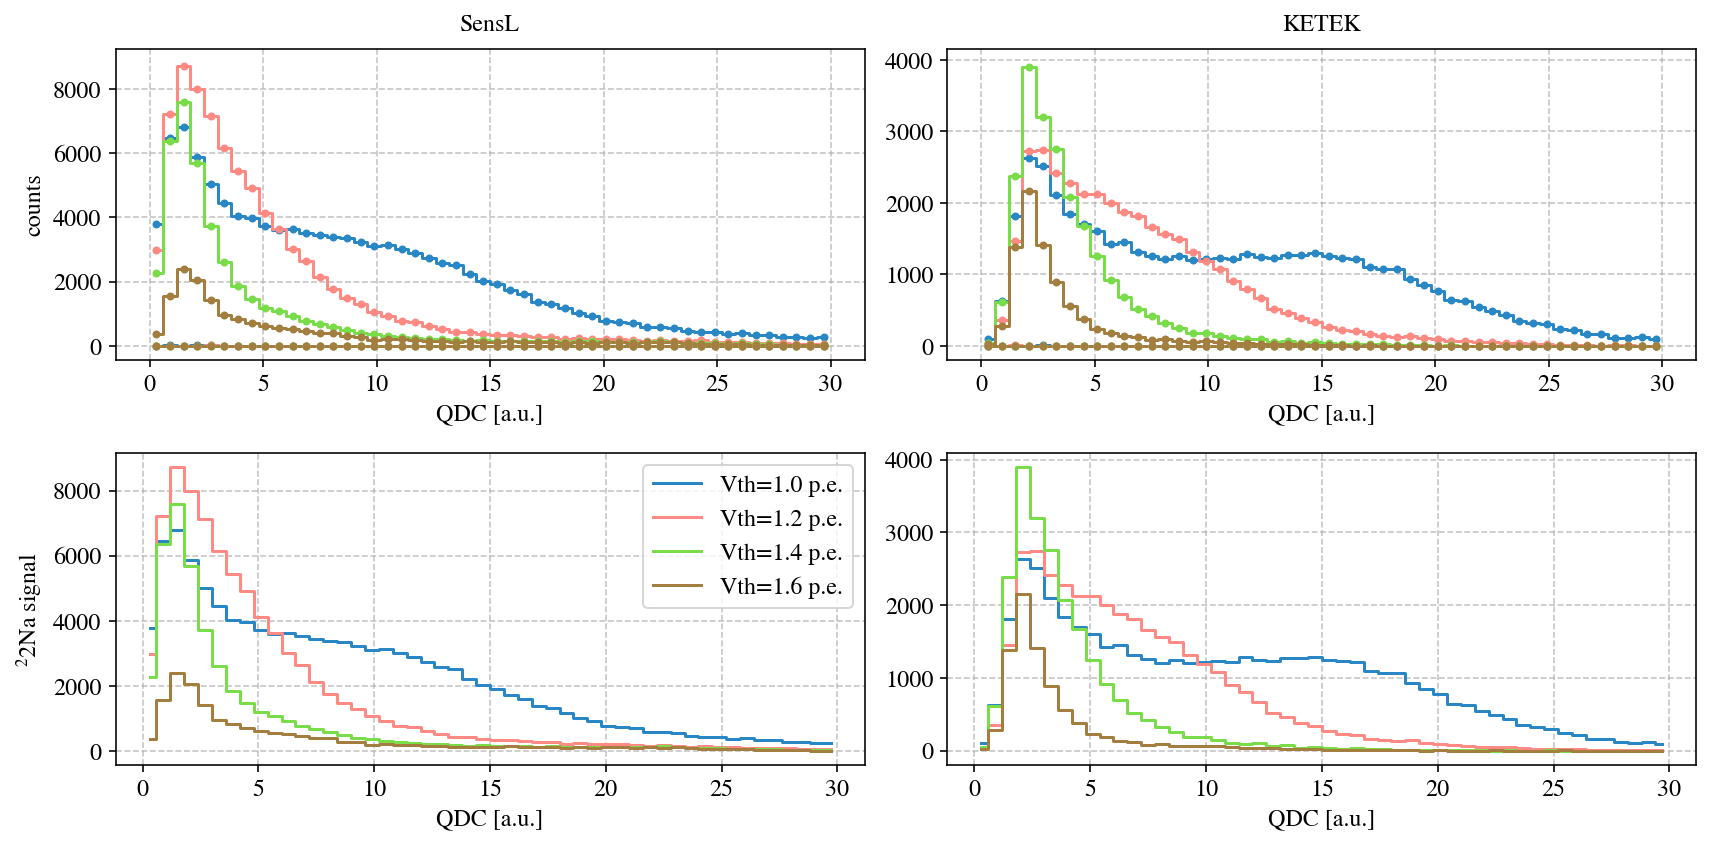

In [5]:
bins = np.linspace(0,30,51)
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(2,2,1)
detector = 12
h_sig,h_sig_err = dict(),dict()
for Vth,color in zip(Vthresholds[:4],colors):
    detector_bg = events['background Vth=%d'%Vth][(events['background Vth=%d'%Vth]['detector']==detector)]
    x,h_bg,x_err,h_bg_err = plot_step_hist(detector_bg['Qtot[a.u.]'],bins=bins,
                                           label='Vth=%.1fp.e.'%(Vth*0.2),color=color,
                                           capsize=0,capthick=0,marker='.',linewidth=0)
    
    detector_fg = events['$^{22}$Na / SensL Vth=%d'%Vth][(events['$^{22}$Na / SensL Vth=%d'%Vth]['detector']==detector)]
    x,h_fg,x_err,h_fg_err = plot_step_hist(detector_fg['Qtot[a.u.]'],bins=bins,
                                           label=None,color=color,                   
                                           capsize=0,capthick=0,marker='.',linewidth=0)

    h_sig[Vth] = h_fg - h_bg
    h_sig_err[Vth] = np.sqrt(h_fg_err*h_fg_err + h_bg_err*h_bg_err)
    
    
set_axes(ax,'QDC [a.u.]','counts',title='SensL',do_add_grid=True,do_add_legend=False,fontsize=12);



ax = fig.add_subplot(2,2,3)
for Vth,color in zip(Vthresholds[:4],colors):
    plt.step ( x, h_sig[Vth], color=color, where='mid', label='Vth=%.1f p.e.'%(Vth*0.2)) 

set_axes(ax,'QDC [a.u.]','$^22$Na signal',do_add_grid=True,do_add_legend=True,fontsize=12);


ax = fig.add_subplot(2,2,2)
detector = 9
h_sig,h_sig_err = dict(),dict()
for Vth,color in zip(Vthresholds[:4],colors):
    detector_bg = events['background Vth=%d'%Vth][(events['background Vth=%d'%Vth]['detector']==detector)]
    x,h_bg,x_err,h_bg_err = plot_step_hist(detector_bg['Qtot[a.u.]'],bins=bins,
                                           label='Vth=%d'%Vth,color=color,
                                           capsize=0,capthick=0,marker='.',linewidth=0)
    
    detector_fg = events['$^{22}$Na / KETEK Vth=%d'%Vth][(events['$^{22}$Na / KETEK Vth=%d'%Vth]['detector']==detector)]
    x,h_fg,x_err,h_fg_err = plot_step_hist(detector_fg['Qtot[a.u.]'],bins=bins,
                                           label=None,color=color,                   
                                           capsize=0,capthick=0,marker='.',linewidth=0)

    h_sig[Vth] = h_fg - h_bg
    h_sig_err[Vth] = np.sqrt(h_fg_err*h_fg_err + h_bg_err*h_bg_err)
    
    
set_axes(ax,'QDC [a.u.]','',title='KETEK',do_add_grid=True,do_add_legend=False,fontsize=12);



ax = fig.add_subplot(2,2,4)
for Vth,color in zip(Vthresholds[:4],colors):
    plt.step ( x, h_sig[Vth], color=color, where='mid', label='Vth=%.1fp.e.'%(Vth*0.2) )

set_axes(ax,'QDC [a.u.]','',do_add_grid=True,do_add_legend=False,fontsize=12);



plt.tight_layout()

## focus on the 1 p.e. spectrum and find the Compton edge 

In [41]:
CE_ch  = np.array([0.  , 22. ]) # ToDo: find this from peaks
m_e    = 511 # keV
E_keV  = np.array([511., 1274.]) # keV
CE_keV = 2*np.square(E_keV)/(2*E_keV + m_e) ; #[341., 1061.] # keV


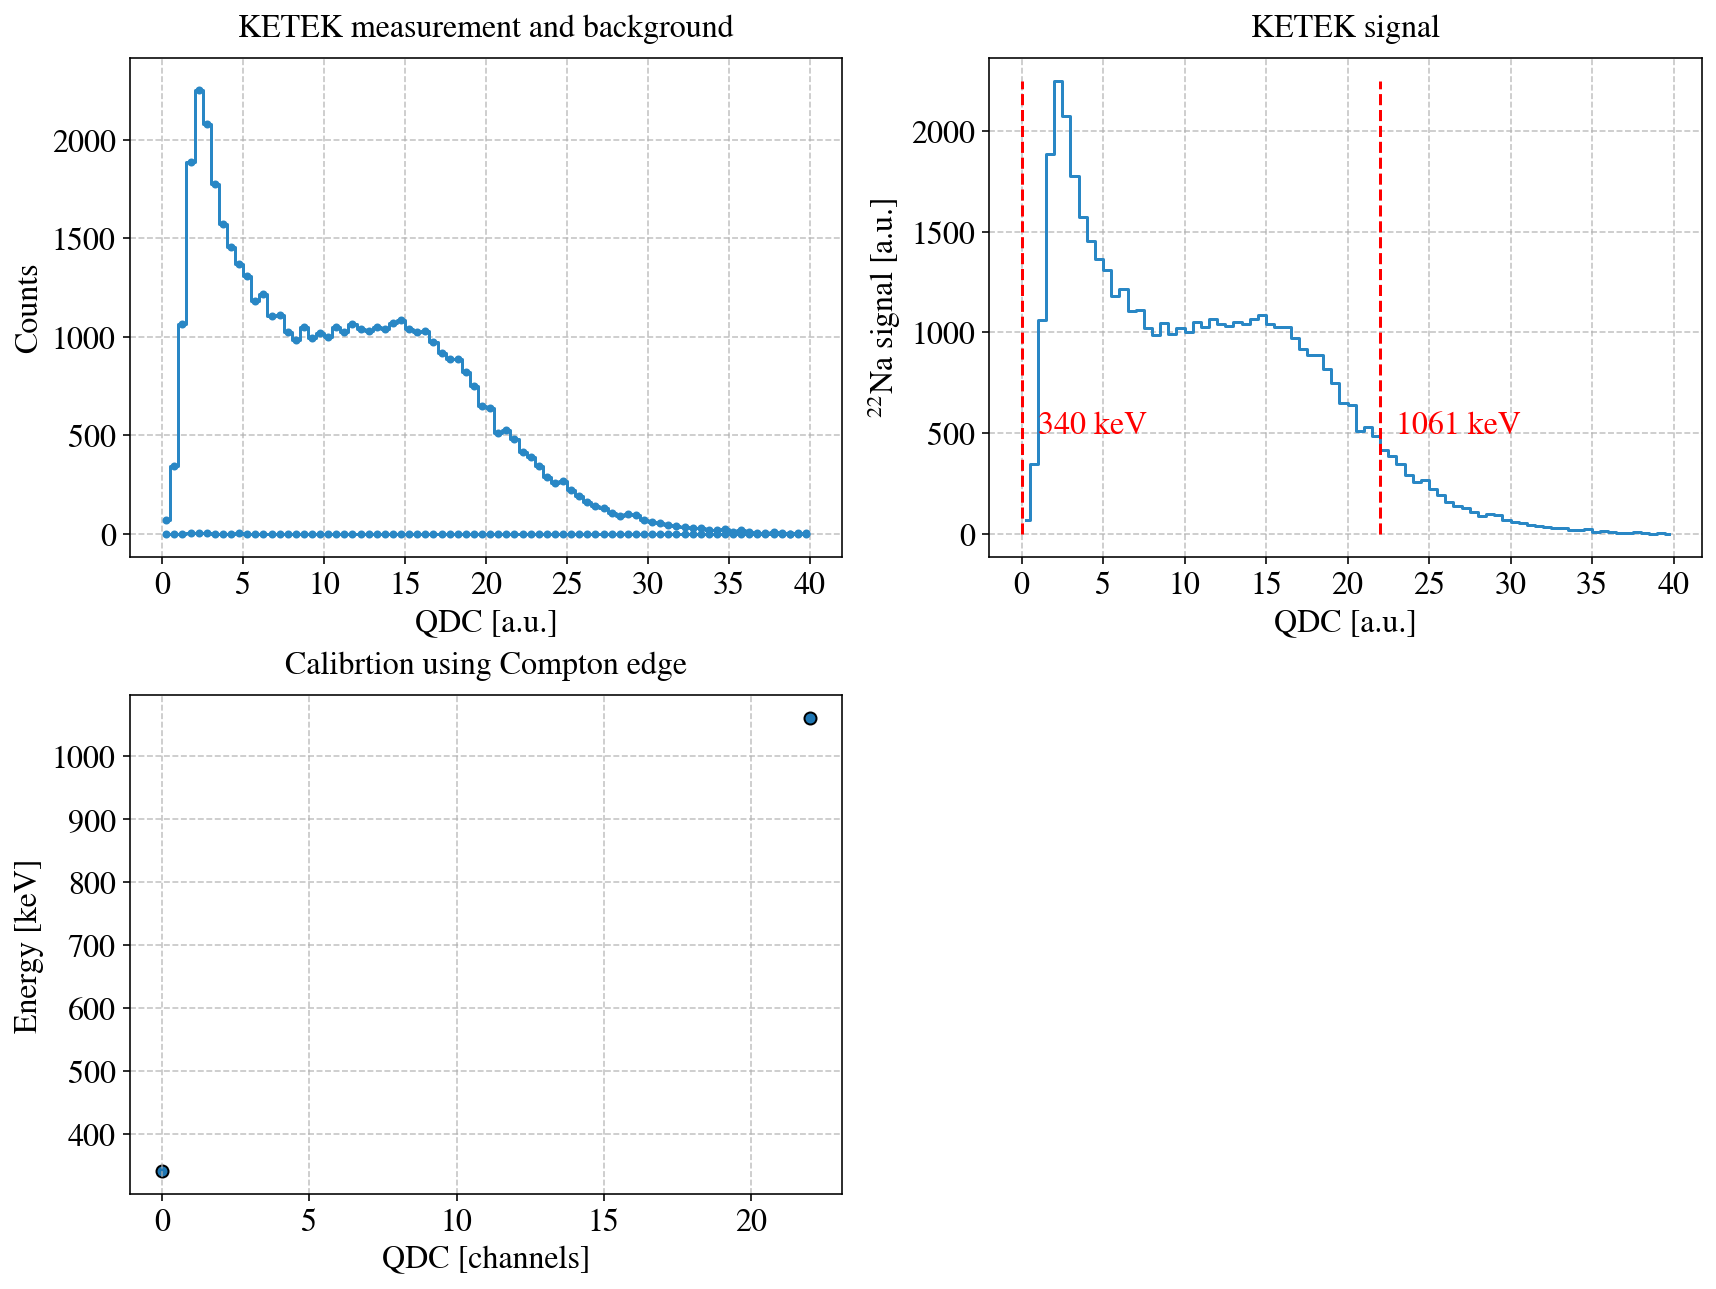

In [45]:
bins = np.linspace(0,40,81)
fig = plt.figure(figsize=(12,9))

ax = fig.add_subplot(2,2,1)
detector = 9
h_sig,h_sig_err = dict(),dict()
for Vth,color in zip([Vthresholds[0]],colors):
    detector_bg = events['background Vth=%d'%Vth][(events['background Vth=%d'%Vth]['detector']==detector)]
    x,h_bg,x_err,h_bg_err = plot_step_hist(detector_bg['Qtot[a.u.]'],bins=bins,
                                           label='Vth=%.1fp.e.'%(Vth*0.2),color=color,
                                           capsize=0,capthick=0,marker='.',linewidth=0)    
    detector_fg = events['$^{22}$Na / KETEK Vth=%d'%Vth][(events['$^{22}$Na / KETEK Vth=%d'%Vth]['detector']==detector)]
    x,h_fg,x_err,h_fg_err = plot_step_hist(detector_fg['Qtot[a.u.]'],bins=bins,
                                           label=None,color=color,                   
                                           capsize=0,capthick=0,marker='.',linewidth=0)
    h_sig[Vth] = h_fg - h_bg
    h_sig_err[Vth] = np.sqrt(h_fg_err*h_fg_err + h_bg_err*h_bg_err)    
set_axes(ax,'QDC [a.u.]','Counts',title='KETEK measurement and background',do_add_grid=True,do_add_legend=False,fontsize=16);


ax = fig.add_subplot(2,2,2)
for Vth,color in zip([Vthresholds[0]],colors):
    plt.step ( x, h_sig[Vth], color=color, where='mid', label='Vth=%.1f p.e.'%(Vth*0.2)) 
set_axes(ax,'QDC [a.u.]','$^{22}$Na signal [a.u.]',
         title='KETEK signal',do_add_grid=True,do_add_legend=False,fontsize=16);

for CE,E in zip(CE_ch,CE_keV):
    plt.plot([CE,CE],[0,np.max(h_sig[Vth])],'--r')
    plt.text(CE+1,500,'%d keV'%E,color='r', fontsize=16)

    
ax = fig.add_subplot(2,2,3)
plt.scatter ( CE_ch, CE_keV , marker='o', edgecolor='k') 
set_axes(ax,'QDC [channels]','Energy [keV]',
         title='Calibrtion using Compton edge',do_add_grid=True,do_add_legend=False,fontsize=16);


plt.tight_layout()